In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [33]:
from scipy import stats # For statistical tests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # NEW: Import Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
data = pd.read_csv("health care diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data[data.isnull()].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
print(data.describe())
print(f"\nDataset shape: {data.shape[0]} rows, {data.shape[1]} columns")

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Exploratory Data Analysis (EDA)


Visualizing distributions of numerical features...
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


C:\Users\wenfe\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\wenfe\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\wenfe\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\wenfe\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

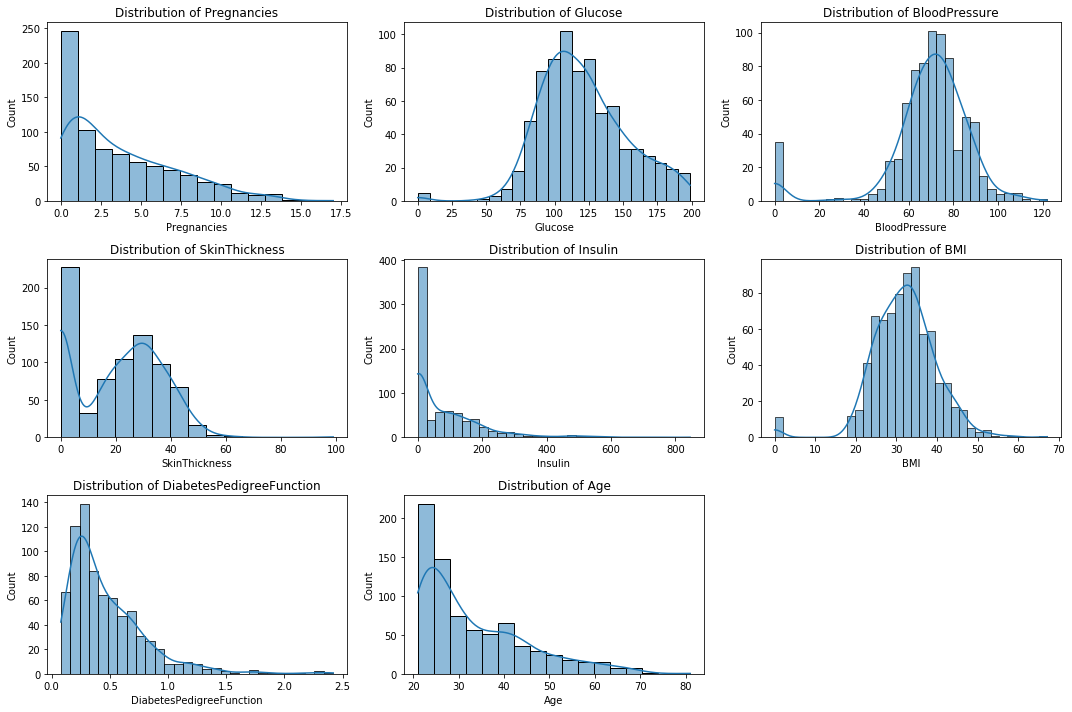

In [16]:
# Visualizing distributions of numerical features
df=data.copy()
print("\nVisualizing distributions of numerical features...")
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)
# Remove 'Outcome' from numerical_cols for individual feature plots, keep it for analysis against features
if 'Outcome' in numerical_cols:
     numerical_cols.remove('Outcome')
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True) # Dropna for plotting if NaNs introduced
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

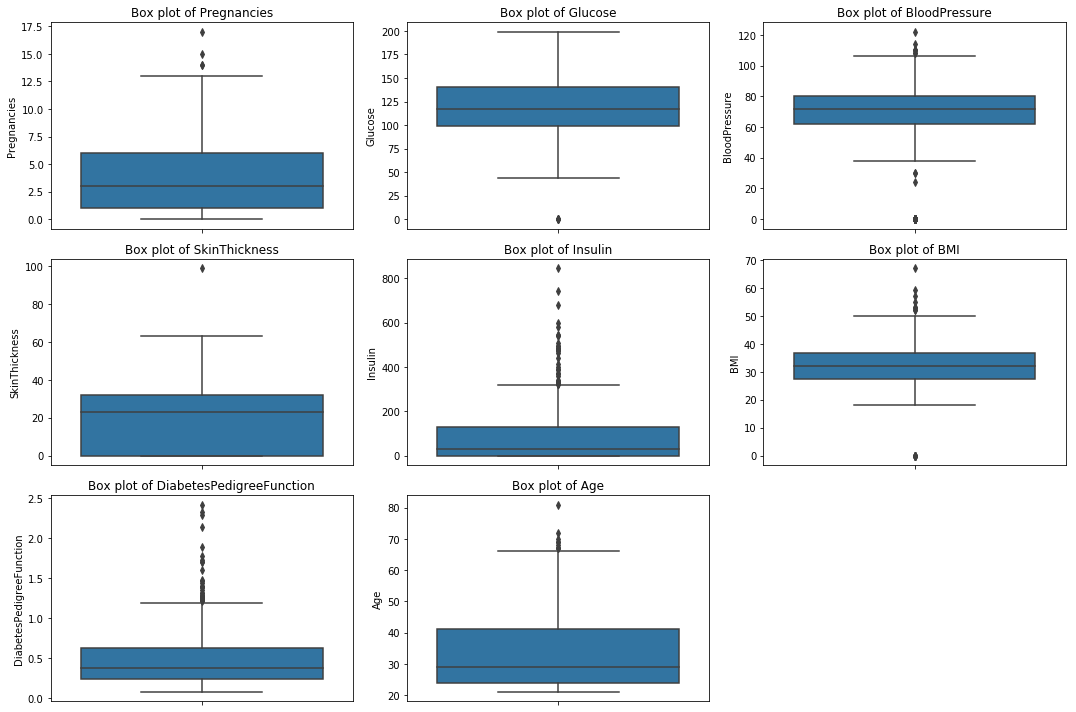

In [14]:
# Box plots for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


Analyzing relationships with 'Outcome' (Diabetes Status)...


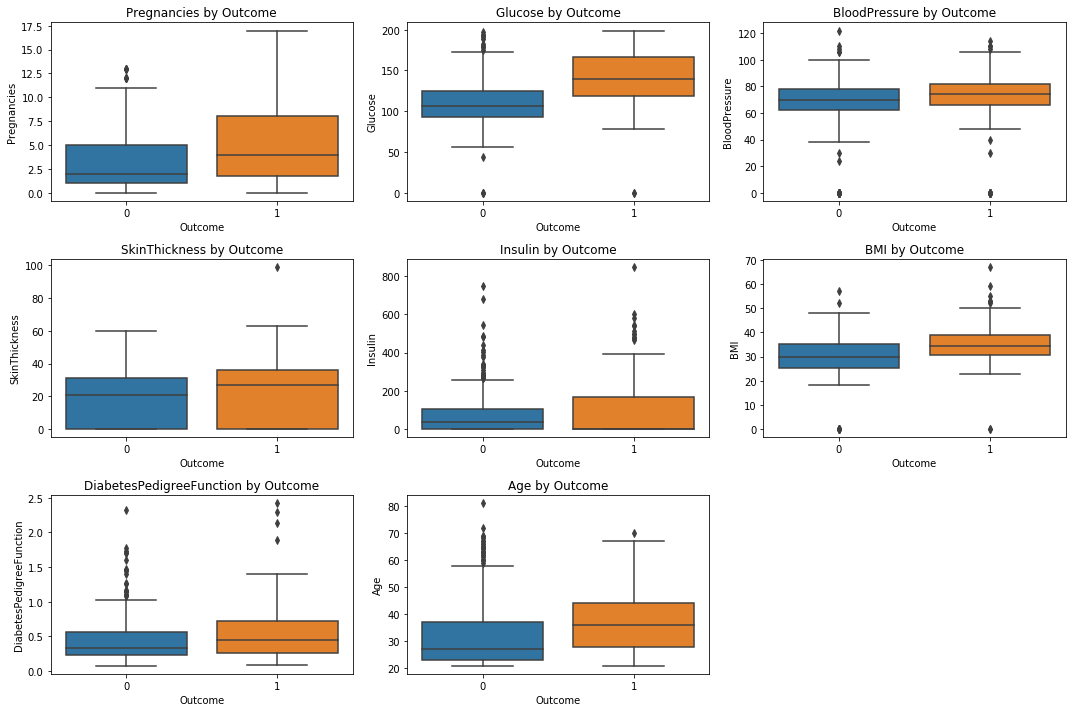

In [17]:
# Relationship with Outcome (Bivariate Analysis)
print("\nAnalyzing relationships with 'Outcome' (Diabetes Status)...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} by Outcome')
plt.tight_layout()
plt.show()


Correlation Matrix:


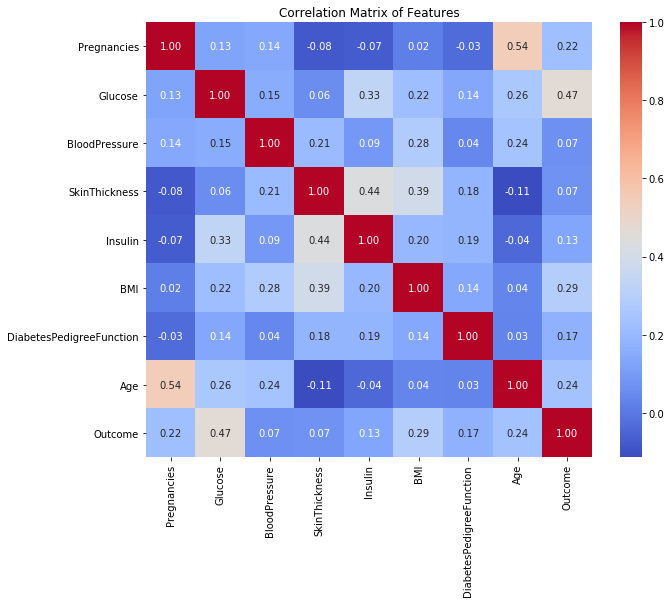

In [53]:
# Correlation Matrix
print("\nCorrelation Matrix:")
plt.figure(figsize=(10, 8))
# Removed numeric_only=True as it's not supported in older Pandas versions
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Statistical Analysis

In [26]:
# Grouped statistics by Outcome
print("\nMean and Median of features grouped by Outcome:")
print(df.groupby('Outcome').agg(['mean', 'median']).transpose())

# Hypothesis Testing (Independent t-tests and One-Way ANOVA)
# Create a temporary DataFrame to handle NaNs for statistical tests
df_temp_imputed = df.copy()
# Impute NaNs that were introduced by replacing zeros with the median of the respective group (Outcome)
cols_with_potential_zeros_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_potential_zeros_as_missing:
     df_temp_imputed[col] = df_temp_imputed.groupby('Outcome')[col].transform(lambda x: x.fillna(x.median()))
# Also ensure any other potential NaNs are filled for the statistical tests
for col in df_temp_imputed.columns:
    if df_temp_imputed[col].isnull().any():
        df_temp_imputed[col] = df_temp_imputed[col].fillna(df_temp_imputed[col].median())


print("\n--- Hypothesis Testing ---")
print("Performing independent t-tests and one-way ANOVA for numerical features vs. Outcome.")
print("Note: For a binary outcome variable (like 'Outcome' here), a one-way ANOVA is statistically equivalent to an independent samples t-test.")

for col in numerical_cols: # numerical_cols already excludes 'Outcome'
    if df_temp_imputed[col].notna().all(): # Ensure no NaNs remain for the test
        group_0 = df_temp_imputed[df_temp_imputed['Outcome'] == 0][col]
        group_1 = df_temp_imputed[df_temp_imputed['Outcome'] == 1][col]

        print(f"\n--- Analysis for '{col}' ---")

        # Independent T-test
        t_stat, p_value_t = stats.ttest_ind(group_1, group_0, equal_var=False) # Welch's t-test for unequal variances
        print(f"  Independent t-test for '{col}' between Diabetic (Outcome=1) and Non-Diabetic (Outcome=0) groups:")
        print(f"    T-statistic: {t_stat:.3f}")
        print(f"    P-value: {p_value_t:.3f}")
        if p_value_t < 0.05:
            print(f"    Conclusion: Statistically significant difference in '{col}' levels (p < 0.05).")
        else:
            print(f"    Conclusion: No statistically significant difference in '{col}' levels (p >= 0.05).")

        # One-Way ANOVA
        f_stat, p_value_anova = stats.f_oneway(group_0, group_1)
        print(f"  One-Way ANOVA for '{col}' by Outcome:")
        print(f"    F-statistic: {f_stat:.3f}")
        print(f"    P-value: {p_value_anova:.3f}")
        if p_value_anova < 0.05:
            print(f"    Conclusion: Statistically significant difference in '{col}' means across Outcome groups (p < 0.05).")
        else:
            print(f"    Conclusion: No statistically significant difference in '{col}' means across Outcome groups (p >= 0.05).")
    else:
        print(f"\nSkipping statistical tests for '{col}' due to remaining NaN values after imputation.")


Mean and Median of features grouped by Outcome:
Outcome                                   0           1
Pregnancies              mean      3.298000    4.865672
                         median    2.000000    4.000000
Glucose                  mean    109.980000  141.257463
                         median  107.000000  140.000000
BloodPressure            mean     68.184000   70.824627
                         median   70.000000   74.000000
SkinThickness            mean     19.664000   22.164179
                         median   21.000000   27.000000
Insulin                  mean     68.792000  100.335821
                         median   39.000000    0.000000
BMI                      mean     30.304200   35.142537
                         median   30.050000   34.250000
DiabetesPedigreeFunction mean      0.429734    0.550500
                         median    0.336000    0.449000
Age                      mean     31.190000   37.067164
                         median   27.000000   36.000000

# Forecasting (Classification) 

Note: Given the binary 'Outcome' variable, this is a classification problem, not traditional time-series forecasting.

Handling remaining missing values for modeling by imputing with column medians...

Missing values after final imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Training set shape: (537, 8)
Testing set shape: (231, 8)

Scaling features using StandardScaler...
Features scaled successfully.

Training Logistic Regression model...
Model trained successfully.

Logistic Regression Model Evaluation:
  Accuracy: 0.7446
  Precision: 0.6774
  Recall: 0.5185
  F1-Score: 0.5874

  Confusion Matrix for Logistic Regression:


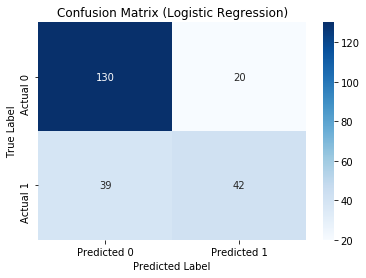

In [36]:
print("Note: Given the binary 'Outcome' variable, this is a classification problem, not traditional time-series forecasting.")

# Data preparation for modeling
# Handle remaining missing values (if any)
# For this demonstration, let's fill NaNs with the median of their respective columns
# A more robust approach might use MICE, KNN imputation, or a model-based imputation
print("\nHandling remaining missing values for modeling by imputing with column medians...")
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())
print("\nMissing values after final imputation:")
print(df.isnull().sum())

X = df.drop('Outcome', axis=1) # Features
y = df['Outcome']             # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Feature Scaling (Standardization)
# It's important to scale features for many models like Logistic Regression
print("\nScaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled successfully.")

# Model Training: Logistic Regression
print("\nTraining Logistic Regression model...")
# liblinear is good for small datasets
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train_scaled, y_train)

# Prediction
lr_y_pred = lr_model.predict(X_test_scaled)
lr_y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]# Probability of positive class
  
print("Model trained successfully.")

print("\nLogistic Regression Model Evaluation:")
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)

print(f"  Accuracy: {lr_accuracy:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall: {lr_recall:.4f}")
print(f"  F1-Score: {lr_f1:.4f}")

print("\n  Confusion Matrix for Logistic Regression:")
lr_cm = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

   



--- Training and Evaluating Random Forest Classifier Model ---

Random Forest Classifier Model Evaluation:
  Accuracy: 0.7576
  Precision: 0.7049
  Recall: 0.5309
  F1-Score: 0.6056

  Confusion Matrix for Random Forest Classifier:


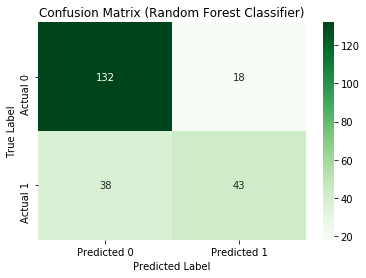


  Classification Report for Random Forest Classifier:
             precision    recall  f1-score   support

          0       0.78      0.88      0.82       150
          1       0.70      0.53      0.61        81

avg / total       0.75      0.76      0.75       231



In [51]:
 # --- Model Training and Evaluation: Random Forest Classifier ---
print("\n--- Training and Evaluating Random Forest Classifier Model ---")
rf_model = RandomForestClassifier(
        random_state=42,
        n_estimators=100,  # Number of trees in the forest
        max_depth=10,      # Maximum depth of each tree (helps prevent overfitting)
        min_samples_leaf=5 # Minimum number of samples required to be at a leaf node (helps prevent overfitting)
    )
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)
rf_y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

print("\nRandom Forest Classifier Model Evaluation:")
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print(f"  Accuracy: {rf_accuracy:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall: {rf_recall:.4f}")
print(f"  F1-Score: {rf_f1:.4f}")

print("\n  Confusion Matrix for Random Forest Classifier:")
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n  Classification Report for Random Forest Classifier:")
print(classification_report(y_test, rf_y_pred))




In [52]:
 # --- Comparison of Results ---
print("\n\n--- Comparison of Model Results ---")
print("| Metric    | Logistic Regression | Random Forest     |")
print("|-----------|---------------------|-------------------|")
print(f"| Accuracy  | {lr_accuracy:<19.4f} | {rf_accuracy:<17.4f} |")
print(f"| Precision | {lr_precision:<19.4f} | {rf_precision:<17.4f} |")
print(f"| Recall    | {lr_recall:<19.4f} | {rf_recall:<17.4f} |")
print(f"| F1-Score  | {lr_f1:<19.4f} | {rf_f1:<17.4f} |")
print("|-----------|---------------------|-------------------|")

if rf_accuracy > lr_accuracy:
    print("\nObservation: Random Forest achieved higher accuracy on this dataset.")
elif lr_accuracy > rf_accuracy:
    print("\nObservation: Logistic Regression achieved higher accuracy on this dataset.")
else:
    print("\nObservation: Both models achieved similar accuracy on this dataset.")
print("Further hyperparameter tuning for both models could potentially improve performance.")

print("\n--- End of Analysis ---")



--- Comparison of Model Results ---
| Metric    | Logistic Regression | Random Forest     |
|-----------|---------------------|-------------------|
| Accuracy  | 0.7446              | 0.7576            |
| Precision | 0.6774              | 0.7049            |
| Recall    | 0.5185              | 0.5309            |
| F1-Score  | 0.5874              | 0.6056            |
|-----------|---------------------|-------------------|

Observation: Random Forest achieved higher accuracy on this dataset.
Further hyperparameter tuning for both models could potentially improve performance.

--- End of Analysis ---
